# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: The activity score is the outcome, as it indicates if the customer converted. 

#### 2. What are the predictors/covariates? 

Answer: The predictors are age, gender, location, profession, and days since the last log in. 

#### 3. What timeframe is this data relevent for?

Answer: Jan - Apr 2015

#### 4. What is the hypothesis?

Answer: Male users between the ages of 25 - 35 that work in the technology sector are most likely to convert. 

## Let's get started with our dataset

#### 1. Create a data dictionary 

In [2]:
import pandas as pd

path = "../assets/admissions.csv"
df = pd.read_csv(path)
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


Answer: 

Variable | Description | Type of Variable 
---| ---| ---
admit | 0 = not admitted 1 = admitted | categorical
gre | test score| continuous
gpa | grade point average | continious
prestige | rank of undergradate school | ordinal


In [3]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [4]:
df.shape

(400, 4)

In [5]:
df.describe()

/Users/leelewis/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [6]:
#Drop Null Values in order to eliminate any noise in the data. This is a safe step, as there are only a few rows
# with nulls. If this function would have dropped too many significant rows, I would have selected a 
#specific column to drop instead. 

dfClean = df.dropna()

dfClean.count()


admit       397
gre         397
gpa         397
prestige    397
dtype: int64

### dfAdmit = dfClean[ dfClean.admit ==1]
dfNoAdmit = dfClean[ dfClean.admit == 0]

print dfAdmit.describe()
print dfNoAdmit.describe()


We would like to explore the association between X and Y 

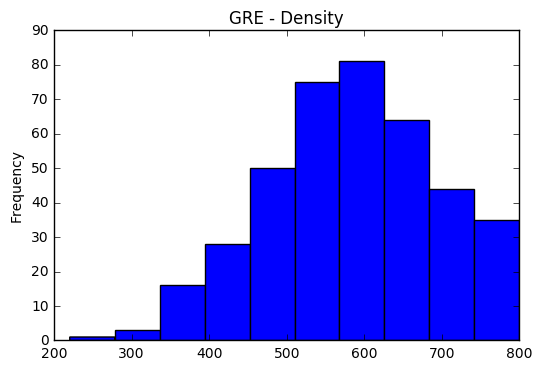

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline


#plot for GRE

dfClean.gre.plot(kind="hist", title = 'GRE - Density')
             

plt.vlines(dfClean.gre.mean(),     # Plot black line at mean
           ymin=0,
           ymax=.0035,
           linewidth=3.0)

plt.vlines(dfClean.gre.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="red")

plt.vlines(dfClean.gre.mode(),   # Plot red line at median
           ymin=0, 
           ymax=0.0035, 
           linewidth=2.0,
           color="yellow")



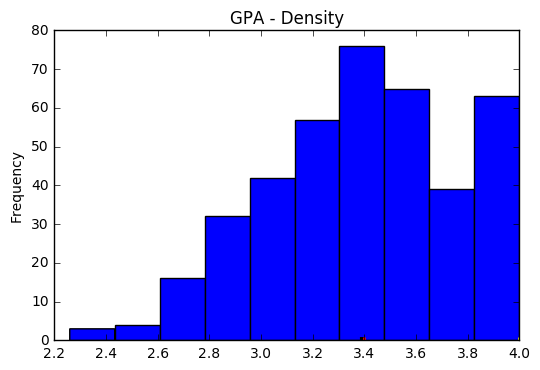

In [25]:
#plot for GPA

dfClean.gpa.plot(kind="hist", title = 'GPA - Density')
             

plt.vlines(dfClean.gpa.mean(),     # Plot black line at mean
           ymin=0,
           ymax=1,
           linewidth=3.0)

plt.vlines(dfClean.gpa.median(),   # Plot red line at median
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="red")


plt.vlines(dfClean.gpa.mode(),   # Plot red line at median
           ymin=0, 
           ymax=1, 
           linewidth=2.0,
           color="yellow")

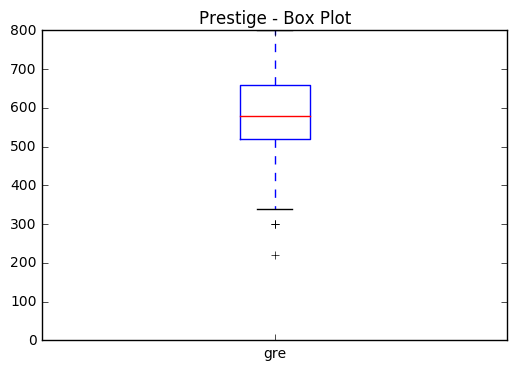

In [27]:
#plot for prestige

dfClean.gre.plot(kind="box", title = 'Prestige - Box Plot') # a box plot is better suited for categorical variables
             

plt.vlines(dfClean.gre.mean(),   # Plot red line at median
           ymin=0, 
           ymax=5, 
           linewidth=2.0,
           color="green")



In [10]:
print dfClean.kurtosis() # slightly negative, means slightly less kurtosis than a normal distribution

print dfClean.skew() #very litle skewness

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64
admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64


#### 2. What is the outcome?

Answer: The Admit column is the outcome. It indicates if the student was admitted. 

#### 3. What are the predictors/covariates? 

Answer: The predictors are GRE, GPA, and Prestige. They influence if the student is admitted. 

#### 4. What timeframe is this data relevent for?

Answer: Timeframe is not defined


#### 4. What is the hypothesis?

Answer: The data has slightly less kurtosis than a normal distribution. Most of the values are close to the mean.

    Using the above information, write a well-formed problem statement

Determine which students will get admitted to grad school using their undergraduate GPA, GRE and the Prestige of their undergraduate school. Prestige is a numerical value where higher values indicate more prestigious schools. 

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: 
1. Understand the general structure and composition of the data set
2. Confirm the distribution of each predictor varible
3. Determine the correlation between the predictors and the outcome variable

#### 2a. What are the assumptions of the distribution of data? 

Answer: The data sets have a kurtosis very close to zero, which means the data sets are similar to normal distributions. 

#### 2b. How will determine the distribution of your data? 

Answer: The distribution can be determined using a density plot or histogram.

#### 3a. How might outliers impact your analysis? 

Answer: Outliers can push the mean to the right. In some cases, we may consider removing the outliers, as they will negatively impact the correlation between the predictors and the outcome varible

#### 3b. How will you test for outliers? 

Answer: A scatter plot is a quick way to visually identify outliers in the data. I can also assume that any value more than two standard devations from the mean is considered an outlier. 

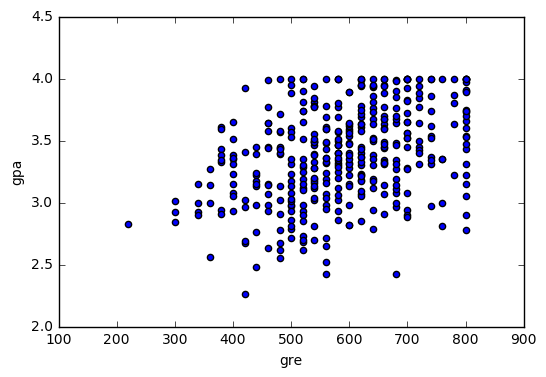

In [19]:
dfClean.plot(kind = 'scatter' , x= 'gre', y = 'gpa')

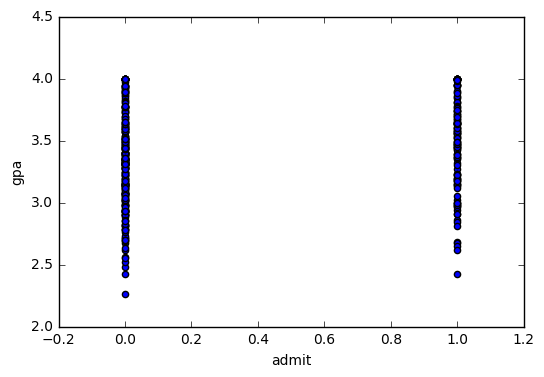

In [12]:
dfClean.plot(kind = 'scatter' , x= 'admit', y = 'gpa')

In [13]:
#we can also use the zscore to assess if the values are outliers. Greater than 3 or less than -3 indicates an outlier

zscores = dfClean.apply(lambda x: (x - x.mean()) / x.std())

print zscores

        admit       gre       gpa  prestige
0   -0.681009 -1.796257  0.572734  0.539905
1    1.464710  0.623422  0.730542  0.539905
2    1.464710  1.833262  1.598487 -1.571841
3    1.464710  0.450588 -0.531924  1.595778
4   -0.681009 -0.586418 -1.215759  1.595778
5    1.464710  1.487594 -1.031650 -0.515968
6    1.464710 -0.240749 -1.084253 -1.571841
7   -0.681009 -1.623423 -0.821239 -0.515968
8    1.464710 -0.413583 -0.005896  0.539905
9   -0.681009  0.969091  1.388076 -0.515968
10  -0.681009  1.833262  1.598487  1.595778
11  -0.681009 -1.277755 -0.453020 -1.571841
12   1.464710  1.487594  1.598487 -1.571841
13  -0.681009  0.969091 -0.821239 -0.515968
14   1.464710  0.969091  1.598487 -1.571841
15  -0.681009 -0.932086  0.125611  0.539905
16  -0.681009  1.660428  1.256570  1.595778
17  -0.681009 -1.969092 -2.188910  0.539905
18  -0.681009  1.833262  0.940953 -0.515968
19   1.464710 -0.413583  1.098761 -1.571841
20  -0.681009 -0.759252 -0.584526  0.539905
21   1.464710  0.623422  0.62533

In [14]:
#Identify Gre and Gpa values that are outliers. 

outGre = zscores[(zscores['gre'] > 2.5) | (zscores['gre'] < -2.5)]
outGpa = zscores[(zscores['gpa'] > 2.9) | (zscores['gpa'] < -2.9)]

print outGre
print outGpa

#print outGpa.count()

        admit       gre       gpa  prestige
304 -0.681009 -3.178932 -1.478773  0.539905
        admit       gre       gpa  prestige
289 -0.681009 -1.450589 -2.977951  1.595778


#### 4a. What is colinearity? 

Answer: A situation where two predictors have positive correlations. If this is the case, one of the predictors should be removed. 

#### 4b. How will you test for colinearity? 

Use .corr to return correlation values for all columns in a dataframe. Two predictors are collinear if they have a correlation close to 1 or -1.


In [15]:
dfClean.corr()['gre'] #no colinearity

admit       0.181202
gre         1.000000
gpa         0.382408
prestige   -0.124533
Name: gre, dtype: float64

In [16]:
dfClean.corr()['gpa'] #no colinearity

admit       0.174116
gre         0.382408
gpa         1.000000
prestige   -0.060976
Name: gpa, dtype: float64

In [17]:
dfClean.corr()['prestige'] #no colinearity

admit      -0.243563
gre        -0.124533
gpa        -0.060976
prestige    1.000000
Name: prestige, dtype: float64

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

# Answer: 

Assumption: the file has already been read into a dataframe: 

1. Use the following to understand the general structure and composition of the data set:
    1. Head
    2. Describe
    3. Count
    4. Shape
    5. If there are several nulls, assess whether the rows can be dropped, or if specific column should be dropped, to avoid too many significant rows. 
2. Generate histogram and density charts to assess the distribution of data. 
3. Identify outliers using standard deviation and zscore. 
3. Generate a scatter plot to visually asses correlation for each predictor vs. outcome variable
4. Use .corr to generate correlation values for all columns in the data frame


In [18]:
#Coefficient of Dispersion

cpNoAdmit = dfNoAdmit.gre.mean() / dfNoAdmit.gre.std()
cpAdmit = dfAdmit.gre.mean() / dfAdmit.gre.std()

print cpNoAdmit
print cpAdmit

NameError: name 'dfNoAdmit' is not defined

In [ ]:
dfClean.gpa.kurtosis()

In [28]:
#dfClean.groupby(["prestige","admit"]).size()

print pd.crosstab(dfClean.prestige ,dfClean.admit)

admit      0   1
prestige        
1.0       28  33
2.0       95  53
3.0       93  28
4.0       55  12


## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

1. Outline your analysis method for predicting your outcome

Assuming we're starting where the previous lesson ended:
 1. Convert categorical variables into seperate columns using get_dummies()
 2. Join the new columns to the existing data frame.
 3. Run a logistic model to predict the outcome

In [ ]:
 dummy_prestige = pd.get_dummies(dfClean['prestige'], prefix='prestige')

In [ ]:
print dummy_prestige.head(5)

In [ ]:
columns = ['admit', 'gre', 'gpa']
data = dfClean[columns].join(dummy_prestige.ix[:, 'prestige_2':])
print data.head()
data['intercept'] = 1.0


In [ ]:
!pip statsmodels

In [ ]:
import statsmodels.api as sm

train_cols = data.columns[1:]
 
#logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
#result = logit.fit()
type(train_cols)

In [ ]:
 print result.summary()
    

In [ ]:
dfClean.describe()

In [ ]:
tab.transpose